# COGS 108 - Innovating Patient Care: The Correlation Between Hospital Operations and Patient Satisfaction 

# Names

- Sanjuktha Arhtam
- Kaye Falaminiano
- Beatrice Fernandez
- Vinuthna Maradana
- Dinh Nguyen

# Overview

Our project aimed to identify the key aspects of patient experience and hospital performance that most significantly influence overall hospital ratings in the United States. We utilized two comprehensive datasets: the Hospital General Information dataset, which includes performance metrics such as mortality, safety, and readmission rates, and the HCAHPS Hospital Ratings Survey dataset, which captures patient experience ratings on cleanliness, staff responsiveness, and more. After thorough data cleaning and preparation, we conducted correlation analyses to determine the relationships between specific patient experience ratings and overall hospital ratings. Our findings reveal that aspects such as staff responsiveness, care transitions, and recommendation likelihood have strong positive correlations with higher overall hospital ratings. This suggests that enhancing these specific areas can significantly improve hospital performance and patient satisfaction. By highlighting the most influential factors, our research provides potential insights for healthcare institutions aiming to improve their overall quality and patient care.

Our final video: https://drive.google.com/file/d/1Iyf6idnnu8zYZpajj6XrnRo9BIToLWmY/view?usp=drivesdk

# Research Question

What patient-experience aspects are most strongly correlated with elevated patient satisfaction scores in hospitals within the United States? Additionally, how can these aspects be statistically linked to hospital performance metrics to enhance patient care in that context, specifically which operational aspects are most strongly correlated with overall hospital rating?
- So within Hospital General Information, we are looking at different measures like facility safety measures, readmission measures and mortality measures to see which ones are the most correlated with higher hospital ratings.
- And within both of the datasets, we are comparing each of the unique HCAHPS patient survey star ratings (i.e. cleanliness, quietness etc.) across the overall hospital ratings to see which factors are the most relevant to higher ratings.

## Background and Prior Work

Patient satisfaction is a fundamental measure of healthcare quality. Understanding the key factors that influence patient satisfaction is essential for improving healthcare delivery. In our project, we aim to identify significant correlations between operational, geographical and patient-related factors and patient satisfaction scores. By doing so, we aim to provide action insights for healthcare administrators and policymakers. We also aim to develop evidence-based strategies to optimize patient care, improve resource allocation and enhance overall hospital performance, creating a win-win situation for both hospitals and patients.

A project that was similar to ours was the FinalProjects-SP17/052-FinalProject which was about Flu Demographics [1]. They tried to find if higher flu rate is correlated with lower income regions and used a t-test to see if the discharge/hospitalization rate is dependent on income. This project can be connected to ours as we are both comparing the quality of healthcare provided to patients that come from different backgrounds and demographics. FinalProjects-Wi21/083-FinalProject was also another project that is relatively similar to ours, talking about the correlation between median household income and a person’s likelihood of contracting COVID-19 [2]. While those projects are focused on the correlation between flu/COVID-19 rates and low income communities, ours will also be connecting the patient’s income as well as other factors that likely contribute to the overall quality and satisfaction provided by hospitals to these patients. We will be observing the ratings and reviews that multiple hospitals have in regards to patient care and see what factors play a significant role in why they were given that certain rating. We will be comparing factors in a geographical, financial, and operational context to see what higher rated hospitals have that lower rated hospitals do not and also come up with ideas as to how we can improve patient care for everyone.

Hospitals in the U.S. get rated through overall star ratings which was formed by the Centers for Medicare and Medicaid Services (CMS), the five measure groups it uses includes mortality, safety of care, readmission, patient experience and timely & effective care in which they are all equally weighted. The Overall Star Rating based on July 2023 shows that 46.4% of the hospitals got a 3 star or above on this scale and according to these five measure groups [3].

[1] https://github.com/COGS108/FinalProjects-Sp17/blob/master/052-FinalProject.ipynb

[2] https://github.com/COGS108/FinalProjects-Wi21/blob/main/FinalProject_group083.ipynb

[3] https://data.cms.gov/provider-data/topics/hospitals/overall-hospital-quality-star-rating/

# Hypothesis


We hypothesize that safety measures, readmission measures and mortality will have the most impact on hospital overall rating. We hypothesize that patient experience factors such as cleanliness and responsiveness of staff will strongly correlate with patient satisfaction. These factors will be statistically analyzed to link improvements in these areas to better hospital performance metrics, such as higher patient safety standards, thereby indicating how targeted improvements can enhance overall patient care.

We chose these hypotheses because based on the Centers for Medicare and Medicaid Services, they mentioned that these are the measures that people use to make the ratings.

# Data

## Data overview

For each dataset include the following information
- Dataset #1
  - Dataset Name: Hospital General Information (CMS)
  - Link to the dataset:https://data.cms.gov/provider-data/dataset/xubh-q36u
  - Number of observations: 5425
  - Number of variables: 39
  
The Hospital General Information Dataset contains detailed data on U.S. hospitals, highlighting operational characteristics and performance metrics across various categories such as Hospital Type (e.g., acute care, critical access), Hospital Ownership, and Emergency Services. It includes performance metrics categorized into Mortality (MORT Measures), Safety Measures, Readmission (READM Measures), and Patient Experience (Pt Exp Measures), each quantified by measures rated as "Better," "No Different," or "Worse" compared to national standards. These metrics serve as proxies for clinical effectiveness, operational safety, patient satisfaction, and overall healthcare quality. To ensure accuracy in analysis, the dataset requires preprocessing such as cleaning missing values, standardizing categorical entries, and normalizing performance metrics based on hospital size or capacity. Additionally, it is prepared for integration with other healthcare data, ensuring consistent key identifiers like Facility ID for effective data merging and comprehensive healthcare studies.
 
 
- Dataset #2 
  - Dataset Name: HCAHPS Hospital Ratings Survey
  - Link to the dataset:https://www.kaggle.com/datasets/thedevastator/hcahps-hospital-ratings-survey
  - Number of observations: 4436
  - Number of variables: 24

This dataset includes survey data called the Hospital Consumer Assessment of Healthcare Providers and Systems (HCAHPS) from 2018-2020. This includes data from patients themselves on their experiences, in order to see the hospital’s quality. Some important variables in this dataset include patient survey star rating (ranging from 1 to 5), HCAHPS linear mean value for each hospital in order to compare hospitals and the logistics of the data like the number of completed surveys, survey response rate, the location etc. To ensure cleanliness, we need to get rid of missing values and only include survey questions that describe the star rating. 

If you plan to use multiple datasets, add a few sentences about how you plan to combine these datasets.
- In the Data Dictionary of the first dataset, the pdf included information about both the Hospital General Information dataset as well as the second dataset which is the HCAHPS survey data where it is mentioned that the facility ID and provider ID are the same thing. So we used this variable to combine both datasets.

## Dataset #1: Hospital General Information (CMS) Dataset

In [1]:
## YOUR CODE TO LOAD/CLEAN/TIDY/WRANGLE THE DATA GOES HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION 

In [2]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

In [3]:
# loading the data
dataset1 = pd.read_csv("Hospital_General_Information.csv")
dataset1['State'].describe()

count     5425
unique      56
top         TX
freq       452
Name: State, dtype: object

In [4]:
# removing Variables that won't be used in analysis
columns_to_keep = [
    'Facility ID',
    'Facility Name',
    'Hospital Type',
    'Hospital Ownership',
    'Emergency Services',
    'Meets criteria for promoting interoperability of EHRs',
    'Meets criteria for birthing friendly designation',
    'Hospital overall rating',
    'Count of Facility MORT Measures',
    'Count of MORT Measures Better',
    'Count of MORT Measures No Different',
    'Count of MORT Measures Worse',
    'Count of Facility Safety Measures',
    'Count of Safety Measures Better',
    'Count of Safety Measures No Different',
    'Count of Safety Measures Worse',
    'Count of Facility READM Measures',
    'Count of READM Measures Better',
    'Count of READM Measures No Different',
    'Count of READM Measures Worse',
    
]

#df1 is the new condensed dataset with only important varibles
df1 = dataset1[columns_to_keep]
df1

,Facility ID,Facility Name,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for promoting interoperability of EHRs,Meets criteria for birthing friendly designation,Hospital overall rating,Count of Facility MORT Measures,Count of MORT Measures Better,Count of MORT Measures No Different,Count of MORT Measures Worse,Count of Facility Safety Measures,Count of Safety Measures Better,Count of Safety Measures No Different,Count of Safety Measures Worse,Count of Facility READM Measures,Count of READM Measures Better,Count of READM Measures No Different,Count of READM Measures Worse
0,010001,SOUTHEAST HEALTH MEDICAL CENTER,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,Y,3,7,1,5,1,8,2,6,0,11,0,10,1
1,010005,MARSHALL MEDICAL CENTERS,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,NaN,2,6,0,4,2,7,0,6,1,10,0,10,0
2,010006,NORTH ALABAMA MEDICAL CENTER,Acute Care Hospitals,Proprietary,Yes,Y,Y,1,7,0,5,2,7,2,5,0,9,0,7,2
3,010007,MIZELL MEMORIAL HOSPITAL,Acute Care Hospitals,Voluntary non-profit - Private,Yes,Y,NaN,2,3,0,3,0,2,0,2,0,6,0,5,1
4,010008,CRENSHAW COMMUNITY HOSPITAL,Acute Care Hospitals,Proprietary,Yes,Y,NaN,Not Available,1,0,1,0,Not Available,Not Available,Not Available,Not Available,2,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5420,670300,METHODIST MIDLOTHIAN MEDICAL CENTER,Acute Care Hospitals,Voluntary non-profit - Private,Yes,Y,Y,Not Available,Not Available,Not Available,Not Available,Not Available,2,0,2,0,2,0,2,0
5421,670309,TEXAS HEALTH HOSPITAL MANSFIELD,Acute Care Hospitals,Proprietary,Yes,Y,Y,Not Available,Not Available,Not Available,Not Available,Not Available,2,0,2,0,1,0,1,0
5422,670310,SE TEXAS ER & HOSPITAL,Acute Care Hospitals,Physician,No,NaN,NaN,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
5423,670314,ST MICHAELS MEDICAL HOSPITAL LLC,Acute Care Hospitals,Proprietary,Yes,NaN,NaN,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available


In [5]:
#Checking basics of the Data
print(df1.shape)
print(df1.dtypes)
print(df1.isnull().sum())

(5425, 20)
Facility ID                                              object
Facility Name                                            object
Hospital Type                                            object
Hospital Ownership                                       object
Emergency Services                                       object
Meets criteria for promoting interoperability of EHRs    object
Meets criteria for birthing friendly designation         object
Hospital overall rating                                  object
Count of Facility MORT Measures                          object
Count of MORT Measures Better                            object
Count of MORT Measures No Different                      object
Count of MORT Measures Worse                             object
Count of Facility Safety Measures                        object
Count of Safety Measures Better                          object
Count of Safety Measures No Different                    object
Count of Safety Measures Wors

In [6]:
#Replace non-standard missing values with NaN
df1.replace("Not Available", np.nan, inplace=True)

#Check for missing values again
print(df1.isnull().sum())

Facility ID                                                 0
Facility Name                                               0
Hospital Type                                               0
Hospital Ownership                                          0
Emergency Services                                          0
Meets criteria for promoting interoperability of EHRs    1625
Meets criteria for birthing friendly designation         3200
Hospital overall rating                                  2383
Count of Facility MORT Measures                          1689
Count of MORT Measures Better                            1689
Count of MORT Measures No Different                      1689
Count of MORT Measures Worse                             1689
Count of Facility Safety Measures                        1946
Count of Safety Measures Better                          1946
Count of Safety Measures No Different                    1946
Count of Safety Measures Worse                           1946
Count of

/tmp/ipykernel_180/3004946865.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace("Not Available", np.nan, inplace=True)


In [7]:
#Drop the missing Data
df1_cleaned = df1.dropna()

#Change objects to integers
columns_to_convert = ['Hospital overall rating', 'Count of Facility MORT Measures', 'Count of MORT Measures Better', 'Count of MORT Measures No Different', 'Count of MORT Measures Worse', 'Count of Facility Safety Measures', 'Count of Safety Measures Better', 'Count of Safety Measures No Different', 'Count of Safety Measures Worse', 'Count of Facility READM Measures', 'Count of READM Measures Better', 'Count of READM Measures No Different', 'Count of READM Measures Worse']
df1_cleaned[columns_to_convert] = df1_cleaned[columns_to_convert].astype(int)

#Recheck the cleaned Data
df1_cleaned.head(10)
df1_cleaned

/tmp/ipykernel_180/3664617641.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_cleaned[columns_to_convert] = df1_cleaned[columns_to_convert].astype(int)


,Facility ID,Facility Name,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for promoting interoperability of EHRs,Meets criteria for birthing friendly designation,Hospital overall rating,Count of Facility MORT Measures,Count of MORT Measures Better,Count of MORT Measures No Different,Count of MORT Measures Worse,Count of Facility Safety Measures,Count of Safety Measures Better,Count of Safety Measures No Different,Count of Safety Measures Worse,Count of Facility READM Measures,Count of READM Measures Better,Count of READM Measures No Different,Count of READM Measures Worse
0,010001,SOUTHEAST HEALTH MEDICAL CENTER,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,Y,3,7,1,5,1,8,2,6,0,11,0,10,1
2,010006,NORTH ALABAMA MEDICAL CENTER,Acute Care Hospitals,Proprietary,Yes,Y,Y,1,7,0,5,2,7,2,5,0,9,0,7,2
7,010016,SHELBY BAPTIST MEDICAL CENTER,Acute Care Hospitals,Voluntary non-profit - Private,Yes,Y,Y,4,7,0,7,0,7,2,5,0,9,0,8,1
12,010023,BAPTIST MEDICAL CENTER SOUTH,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,Y,2,7,0,6,1,7,0,4,3,11,1,9,1
13,010024,JACKSON HOSPITAL & CLINIC INC,Acute Care Hospitals,Voluntary non-profit - Private,Yes,Y,Y,1,7,0,6,1,7,0,4,3,11,0,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5387,670088,BAYLOR SCOTT & WHITE MEDICAL CENTER- COLLEGE S...,Acute Care Hospitals,Voluntary non-profit - Private,Yes,Y,Y,4,7,0,7,0,8,1,7,0,11,1,10,0
5392,670103,MEDICAL CITY ALLIANCE,Acute Care Hospitals,Voluntary non-profit - Private,Yes,Y,Y,4,4,0,4,0,5,1,4,0,7,0,7,0
5395,670108,BAYLOR SCOTT & WHITE MEDICAL CENTER - MARBLE F...,Acute Care Hospitals,Voluntary non-profit - Private,Yes,Y,Y,5,4,0,4,0,3,1,2,0,9,1,8,0
5400,670120,THE HOSPITALS OF PROVIDENCE TRANSMOUNTAIN CAMPUS,Acute Care Hospitals,Proprietary,Yes,Y,Y,2,5,0,5,0,7,1,5,1,8,0,7,1


In [8]:
print(df1_cleaned.dtypes)
print(df1_cleaned.isnull().sum())
print(df1_cleaned.shape)

Facility ID                                              object
Facility Name                                            object
Hospital Type                                            object
Hospital Ownership                                       object
Emergency Services                                       object
Meets criteria for promoting interoperability of EHRs    object
Meets criteria for birthing friendly designation         object
Hospital overall rating                                   int64
Count of Facility MORT Measures                           int64
Count of MORT Measures Better                             int64
Count of MORT Measures No Different                       int64
Count of MORT Measures Worse                              int64
Count of Facility Safety Measures                         int64
Count of Safety Measures Better                           int64
Count of Safety Measures No Different                     int64
Count of Safety Measures Worse          

## Dataset #2: HCAHPS Hospital Ratings Survey

In [9]:
## YOUR CODE TO LOAD/CLEAN/TIDY/WRANGLE THE DATA GOES HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION 

In [10]:
# read and display the csv file 
dataset2 = pd.read_csv("Patient_survey__HCAHPS__-_Hospital.csv")
# dataset2.columns

In [11]:
# filter out uneccessary columns
df2 = dataset2.drop(['index', 'Address', 'City','County Name','Phone Number', 
                     'Number of Completed Surveys Footnote','Measure Start Date',
                     'Measure End Date', 'Location'], axis=1)
df2

,Provider ID,Hospital Name,State,ZIP Code,HCAHPS Measure ID,HCAHPS Question,HCAHPS Answer Description,Patient Survey Star Rating,Patient Survey Star Rating Footnote,HCAHPS Answer Percent,HCAHPS Answer Percent Footnote,HCAHPS Linear Mean Value,Number of Completed Surveys,Survey Response Rate Percent,Survey Response Rate Percent Footnote
0,320022,PLAINS REGIONAL MEDICAL CENTER,NM,88101,H_CLEAN_STAR_RATING,Cleanliness - star rating,Cleanliness - star rating,2,NaN,Not Applicable,NaN,Not Applicable,342,22%,NaN
1,320022,PLAINS REGIONAL MEDICAL CENTER,NM,88101,H_CLEAN_LINEAR_SCORE,Cleanliness - linear mean score,Cleanliness - linear mean score,Not Applicable,NaN,Not Applicable,NaN,84,342,22%,NaN
2,320022,PLAINS REGIONAL MEDICAL CENTER,NM,88101,H_COMP_1_U_P,"Patients who reported that their nurses ""Usual...","Nurses ""usually"" communicated well",Not Applicable,NaN,16,NaN,Not Applicable,342,22%,NaN
3,320022,PLAINS REGIONAL MEDICAL CENTER,NM,88101,H_COMP_5_LINEAR_SCORE,Communication about medicines - linear mean score,Communication about medicines - linear mean score,Not Applicable,NaN,Not Applicable,NaN,80,342,22%,NaN
4,320022,PLAINS REGIONAL MEDICAL CENTER,NM,88101,H_COMP_3_STAR_RATING,Staff responsiveness - star rating,Staff responsiveness - star rating,4,NaN,Not Applicable,NaN,Not Applicable,342,22%,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254535,320021,PRESBYTERIAN HOSPITAL,NM,87106,H_HSP_RATING_7_8,Patients who gave their hospital a rating of 7...,"Patients who gave a rating of ""7"" or ""8"" (medium)",Not Applicable,NaN,21,NaN,Not Applicable,1289,26%,NaN
254536,320021,PRESBYTERIAN HOSPITAL,NM,87106,H_QUIET_LINEAR_SCORE,Quietness - linear mean score,Quietness - linear mean score,Not Applicable,NaN,Not Applicable,NaN,79,1289,26%,NaN
254537,320021,PRESBYTERIAN HOSPITAL,NM,87106,H_RECMND_STAR_RATING,Recommend hospital - star rating,Recommend hospital - star rating,4,NaN,Not Applicable,NaN,Not Applicable,1289,26%,NaN
254538,320021,PRESBYTERIAN HOSPITAL,NM,87106,H_RECMND_PY,"Patients who reported YES, they would probably...","""YES"", patients would probably recommend the h...",Not Applicable,NaN,20,NaN,Not Applicable,1289,26%,NaN


In [12]:
# check for null values 
print(df2.shape)
print(df2.isnull().sum())

(254540, 15)
Provider ID                                   0
Hospital Name                                 0
State                                         0
ZIP Code                                      0
HCAHPS Measure ID                             0
HCAHPS Question                               0
HCAHPS Answer Description                     0
Patient Survey Star Rating                    0
Patient Survey Star Rating Footnote      240824
HCAHPS Answer Percent                         0
HCAHPS Answer Percent Footnote           215244
HCAHPS Linear Mean Value                      0
Number of Completed Surveys                   0
Survey Response Rate Percent              24145
Survey Response Rate Percent Footnote    186945
dtype: int64


In [13]:
# drop the footnote columns
df2 = df2.drop(['Patient Survey Star Rating Footnote','Survey Response Rate Percent Footnote',
                'HCAHPS Answer Percent Footnote', 'Survey Response Rate Percent'], axis=1)
df2.isnull().sum()

Provider ID                    0
Hospital Name                  0
State                          0
ZIP Code                       0
HCAHPS Measure ID              0
HCAHPS Question                0
HCAHPS Answer Description      0
Patient Survey Star Rating     0
HCAHPS Answer Percent          0
HCAHPS Linear Mean Value       0
Number of Completed Surveys    0
dtype: int64

In [14]:
df2 = df2.drop(['HCAHPS Answer Percent', 'HCAHPS Answer Description', 'Number of Completed Surveys', 'HCAHPS Measure ID', 'HCAHPS Linear Mean Value'], axis=1)
df2

,Provider ID,Hospital Name,State,ZIP Code,HCAHPS Question,Patient Survey Star Rating
0,320022,PLAINS REGIONAL MEDICAL CENTER,NM,88101,Cleanliness - star rating,2
1,320022,PLAINS REGIONAL MEDICAL CENTER,NM,88101,Cleanliness - linear mean score,Not Applicable
2,320022,PLAINS REGIONAL MEDICAL CENTER,NM,88101,"Patients who reported that their nurses ""Usual...",Not Applicable
3,320022,PLAINS REGIONAL MEDICAL CENTER,NM,88101,Communication about medicines - linear mean score,Not Applicable
4,320022,PLAINS REGIONAL MEDICAL CENTER,NM,88101,Staff responsiveness - star rating,4
...,...,...,...,...,...,...
254535,320021,PRESBYTERIAN HOSPITAL,NM,87106,Patients who gave their hospital a rating of 7...,Not Applicable
254536,320021,PRESBYTERIAN HOSPITAL,NM,87106,Quietness - linear mean score,Not Applicable
254537,320021,PRESBYTERIAN HOSPITAL,NM,87106,Recommend hospital - star rating,4
254538,320021,PRESBYTERIAN HOSPITAL,NM,87106,"Patients who reported YES, they would probably...",Not Applicable


In [15]:
df1_cleaned['Facility ID']

0       010001
2       010006
7       010016
12      010023
13      010024
         ...  
5387    670088
5392    670103
5395    670108
5400    670120
5402    670122
Name: Facility ID, Length: 1903, dtype: object

In [16]:
# inconsistency between number formats observed (look at minimum and compare it with df1)
df2['Provider ID'].describe()

count    254540.000000
mean     266301.328003
std      155768.508256
min       10001.000000
25%      140170.750000
50%      251334.500000
75%      390137.250000
max      670108.000000
Name: Provider ID, dtype: float64

In [17]:
# ensure 'Facility ID' and 'Provider ID' are treated as strings
df1_cleaned['Facility ID'] = df1_cleaned['Facility ID'].astype(str)
df2['Provider ID'] = df2['Provider ID'].astype(str)

# pad 'Provider ID' with leading zeros to ensure they are 6 characters long
df2['Provider ID'] = df2['Provider ID'].str.zfill(6)

# padding works!
df2['Provider ID'].min()

/tmp/ipykernel_180/254515721.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_cleaned['Facility ID'] = df1_cleaned['Facility ID'].astype(str)


'010001'

In [18]:
# Get the list of IDs from df1_cleaned
common_ids = df1_cleaned['Facility ID']
common_ids

0       010001
2       010006
7       010016
12      010023
13      010024
         ...  
5387    670088
5392    670103
5395    670108
5400    670120
5402    670122
Name: Facility ID, Length: 1903, dtype: object

In [19]:
# Filter df2 to keep only rows with IDs present in common_ids
df2_cleaned = df2[df2['Provider ID'].isin(common_ids)]
df2_cleaned

,Provider ID,Hospital Name,State,ZIP Code,HCAHPS Question,Patient Survey Star Rating
0,320022,PLAINS REGIONAL MEDICAL CENTER,NM,88101,Cleanliness - star rating,2
1,320022,PLAINS REGIONAL MEDICAL CENTER,NM,88101,Cleanliness - linear mean score,Not Applicable
2,320022,PLAINS REGIONAL MEDICAL CENTER,NM,88101,"Patients who reported that their nurses ""Usual...",Not Applicable
3,320022,PLAINS REGIONAL MEDICAL CENTER,NM,88101,Communication about medicines - linear mean score,Not Applicable
4,320022,PLAINS REGIONAL MEDICAL CENTER,NM,88101,Staff responsiveness - star rating,4
...,...,...,...,...,...,...
254535,320021,PRESBYTERIAN HOSPITAL,NM,87106,Patients who gave their hospital a rating of 7...,Not Applicable
254536,320021,PRESBYTERIAN HOSPITAL,NM,87106,Quietness - linear mean score,Not Applicable
254537,320021,PRESBYTERIAN HOSPITAL,NM,87106,Recommend hospital - star rating,4
254538,320021,PRESBYTERIAN HOSPITAL,NM,87106,"Patients who reported YES, they would probably...",Not Applicable


In [20]:
# Remove the not applicable and nan values for patient survey star rating column
df2_cleaned = df2[df2['Patient Survey Star Rating'] != 'Not Applicable']
df2_cleaned['Patient Survey Star Rating'] = pd.to_numeric(df2_cleaned['Patient Survey Star Rating'], errors='coerce')
df2_cleaned = df2_cleaned.dropna(subset=['Patient Survey Star Rating'])
df2_cleaned

/tmp/ipykernel_180/2028045691.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_cleaned['Patient Survey Star Rating'] = pd.to_numeric(df2_cleaned['Patient Survey Star Rating'], errors='coerce')


,Provider ID,Hospital Name,State,ZIP Code,HCAHPS Question,Patient Survey Star Rating
0,320022,PLAINS REGIONAL MEDICAL CENTER,NM,88101,Cleanliness - star rating,2.0
4,320022,PLAINS REGIONAL MEDICAL CENTER,NM,88101,Staff responsiveness - star rating,4.0
6,320022,PLAINS REGIONAL MEDICAL CENTER,NM,88101,Discharge information - star rating,3.0
11,320022,PLAINS REGIONAL MEDICAL CENTER,NM,88101,Care transition - star rating,2.0
13,320030,ARTESIA GENERAL HOSPITAL,NM,88210,Summary star rating,4.0
...,...,...,...,...,...,...
254520,320018,MEMORIAL MEDICAL CENTER INC,NM,88011,Quietness - star rating,3.0
254524,320021,PRESBYTERIAN HOSPITAL,NM,87106,Nurse communication - star rating,3.0
254530,320021,PRESBYTERIAN HOSPITAL,NM,87106,Pain management - star rating,3.0
254533,320021,PRESBYTERIAN HOSPITAL,NM,87106,Discharge information - star rating,3.0


# Results

## Exploratory Data Analysis

Carry out whatever EDA you need to for your project.  Because every project will be different we can't really give you much of a template at this point. But please make sure you describe the what and why in text here as well as providing interpretation of results and context.

### Dataset 1: Correlation between readmission, safety and mortality measures against hospital overall rating

We calculated the means within all the facilities, grouped by the number of measures in order to compare the better measures, no different measures and the worse measures.

Then created the histograms for mortality measures, safety measures and readmission measures which we then compared by calculating the correlation coefficients with each variable against hospital overall rating.

In [21]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

In [22]:
# Count of Facility MORT Measures grouped together with the mean

df1_cleaned.groupby('Count of Facility MORT Measures')[['Count of MORT Measures Better', 'Count of MORT Measures No Different', 'Count of MORT Measures Worse']].mean()


,Count of MORT Measures Better,Count of MORT Measures No Different,Count of MORT Measures Worse
Count of Facility MORT Measures,,,
1,0.000000,1.000000,0.000000
2,0.032258,1.967742,0.000000
3,0.000000,2.959391,0.040609
4,0.023364,3.897196,0.079439
5,0.063830,4.829787,0.106383
6,0.185000,5.655000,0.160000
7,0.398317,6.330996,0.270687


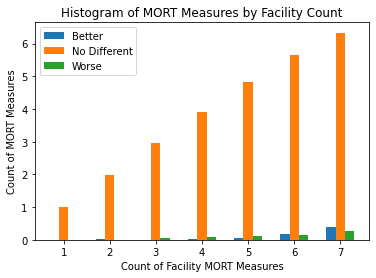

In [23]:
# Data
counts = np.array([1, 2, 3, 4, 5, 6, 7])
better = np.array([0.000000, 0.032258, 0.000000, 0.023364, 0.063830, 0.185000, 0.398317])
no_different = np.array([1.000000, 1.967742, 2.959391, 3.897196, 4.829787, 5.655000, 6.330996])
worse = np.array([0.000000, 0.000000, 0.040609, 0.079439, 0.106383, 0.160000, 0.270687])
fig, ax = plt.subplots()

width = 0.2  # the width of the bars
ax.bar(counts - width, better, width, label='Better')
ax.bar(counts, no_different, width, label='No Different')
ax.bar(counts + width, worse, width, label='Worse')

# Labels and title
ax.set_xlabel('Count of Facility MORT Measures')
ax.set_ylabel('Count of MORT Measures')
ax.set_title('Histogram of MORT Measures by Facility Count')
ax.set_xticks(counts)
ax.legend()

# Display the plot
plt.show()

**What is this distribution?**
- In the Hospital General Information dataset, they have up to 7 mortality measures but each hospital varies with the count from 1 measure to 7 measures. So this histogram shows which number of measures are better, no different or worse and compares it across the number facility mortality measures to be better in scale.

**Are there any outliers?**
- I think like the lower number of facility MORT measures like 3 has no better measures at all which is an outlier.

**Relationship between variables?**
- For this histogram, the count of MORT measures that are no different are much higher than better or worse count measures. So that means the mortality statistics are pretty much the same across various hospitals and throughout the different count of facility MORT measures.

In [24]:
# Define the columns for correlation
better_mort_measures = df1_cleaned['Count of MORT Measures Better']
no_different_mort_measures = df1_cleaned['Count of MORT Measures No Different']
worse_mort_measures = df1_cleaned['Count of MORT Measures Worse']
overall_rating = df1_cleaned['Hospital overall rating']

# Calculate Spearman correlation coefficient and p-value
correlation_better, p_value_better = spearmanr(better_mort_measures, overall_rating)
correlation_no_different, p_value_no_different = spearmanr(no_different_mort_measures, overall_rating)
correlation_worse, p_value_worse = spearmanr(worse_mort_measures, overall_rating)

print("Spearman correlation coefficient (Better Mortality Measures):", correlation_better)
print("Spearman p-value (Better Mortality Measures):", p_value_better)
print("Spearman correlation coefficient (No Different Mortality Measures):", correlation_no_different)
print("Spearman p-value (No Different Mortality Measures):", p_value_no_different)
print("Spearman correlation coefficient (Worse Mortality Measures):", correlation_worse)
print("Spearman p-value (Worse Mortality Measures):", p_value_worse)

Spearman correlation coefficient (Better Mortality Measures): 0.2204941851690067
Spearman p-value (Better Mortality Measures): 2.1934908289947593e-22
Spearman correlation coefficient (No Different Mortality Measures): -0.021489436884919635
Spearman p-value (No Different Mortality Measures): 0.3487923629234423
Spearman correlation coefficient (Worse Mortality Measures): -0.29843844981329776
Spearman p-value (Worse Mortality Measures): 1.8956855548586316e-40


##### What do these correlation coefficients mean?
- There is a weak but statistically significant positive correlation between the hospital overall rating and the count of better mortality measures.
- There is no statistically significant correlation between the hospital overall rating and the count of mortality measures that are "no different" from the average.
- There is a weak to moderate but statistically significant negative correlation between the hospital overall rating and the count of worse mortality measures.

In [25]:
# Count of Facility Safety Measures grouped together with the mean
df1_cleaned.groupby('Count of Facility Safety Measures')[['Count of Safety Measures Better', 'Count of Safety Measures No Different', 'Count of Safety Measures Worse']].mean()

,Count of Safety Measures Better,Count of Safety Measures No Different,Count of Safety Measures Worse
Count of Facility Safety Measures,,,
1,0.000000,1.000000,0.000000
2,0.045455,1.920455,0.034091
3,0.142857,2.836735,0.020408
4,0.289474,3.578947,0.131579
5,0.546763,4.230216,0.223022
6,0.831776,4.789720,0.378505
7,1.182099,5.413580,0.404321
8,1.749522,5.760994,0.489484


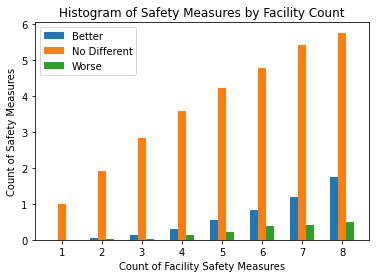

In [26]:
# Histogram 2: Facility Safety Measures
counts_safety = np.array([1, 2, 3, 4, 5, 6, 7, 8])
better_safety = np.array([0.000000, 0.045455, 0.142857, 0.289474, 0.546763, 0.831776, 1.182099, 1.749522])
no_different_safety = np.array([1.000000, 1.920455, 2.836735, 3.578947, 4.230216, 4.789720, 5.413580, 5.760994])
worse_safety = np.array([0.000000, 0.034091, 0.020408, 0.131579, 0.223022, 0.378505, 0.404321, 0.489484])

# Plot for Safety Measures
fig, ax = plt.subplots()

width = 0.2  # the width of the bars
ax.bar(counts_safety - width, better_safety, width, label='Better')
ax.bar(counts_safety, no_different_safety, width, label='No Different')
ax.bar(counts_safety + width, worse_safety, width, label='Worse')

# Labels and title
ax.set_xlabel('Count of Facility Safety Measures')
ax.set_ylabel('Count of Safety Measures')
ax.set_title('Histogram of Safety Measures by Facility Count')
ax.set_xticks(counts_safety)
ax.legend()

# Display the plot
plt.show()

**What is this distribution?**
- In the Hospital General Information dataset, they have up to 8 safety measures but each hospital varies with the count from 1 measure to 8 measures. So this histogram shows which number of measures are better, no different or worse and compares it across the number facility safety measures to be better in scale.

**Are there any outliers?**
- I don't think so, all the measures except 1 has all better, no different and worse safety measure count.

**Relationship between variables?**
- For Safety measures, there definitely are higher number of better safety measures than there are higher number of better mortality measures which means the hospitals have higher number of better safety measures.
- But the main thing is that most of the safety measures are no different from other facilities.

In [27]:
better_safety_measures = df1_cleaned['Count of Safety Measures Better']
no_different_safety_measures = df1_cleaned['Count of Safety Measures No Different']
worse_safety_measures = df1_cleaned['Count of Safety Measures Worse']
overall_rating = df1_cleaned['Hospital overall rating']

# Calculate Spearman correlation coefficient and p-value
correlation_coefficient_better, p_value_better = spearmanr(better_safety_measures, overall_rating)
correlation_coefficient_no_different, p_value_no_different = spearmanr(no_different_safety_measures, overall_rating)
correlation_coefficient_worse, p_value_worse = spearmanr(worse_safety_measures, overall_rating)

# Print the results
print("Spearman correlation coefficient (Better Safety Measures):", correlation_coefficient_better)
print("P-value (Better Safety Measures):", p_value_better)

print("Spearman correlation coefficient (No Different Safety Measures):", correlation_coefficient_no_different)
print("P-value (No Different Safety Measures):", p_value_no_different)

print("Spearman correlation coefficient (Worse Safety Measures):", correlation_coefficient_worse)
print("P-value (Worse Safety Measures):", p_value_worse)

Spearman correlation coefficient (Better Safety Measures): 0.08176200840052227
P-value (Better Safety Measures): 0.00035647566042761074
Spearman correlation coefficient (No Different Safety Measures): 0.025314052050768185
P-value (No Different Safety Measures): 0.2697076732554887
Spearman correlation coefficient (Worse Safety Measures): -0.28154587520821256
P-value (Worse Safety Measures): 5.2340442411037105e-36


##### What do these correlation coefficients mean?
- There is a very weak but statistically significant positive correlation between the hospital overall rating and the count of better safety measures.
- There is no statistically significant correlation between the hospital overall rating and the count of safety measures that are "no different" from the average.
- There is a weak to moderate but statistically significant negative correlation between the hospital overall rating and the count of worse safety measures.

In [28]:
# Count of Facility READM Measures grouped together with the mean
df1_cleaned.groupby('Count of Facility READM Measures')[['Count of READM Measures Better', 'Count of READM Measures No Different', 'Count of READM Measures Worse']].mean()

,Count of READM Measures Better,Count of READM Measures No Different,Count of READM Measures Worse
Count of Facility READM Measures,,,
1,0.000000,1.000000,0.000000
2,0.400000,1.400000,0.200000
3,0.142857,2.857143,0.000000
4,0.166667,3.583333,0.250000
5,0.237288,4.389831,0.372881
6,0.232323,5.393939,0.373737
7,0.341014,6.152074,0.506912
8,0.332103,6.878229,0.789668
9,0.384615,7.926036,0.689349


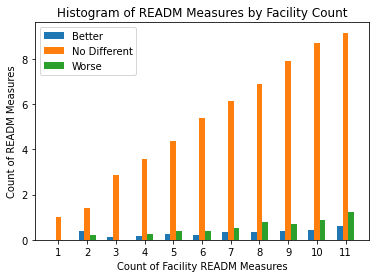

In [29]:
# Histogram 3: READM (readmission) measures
counts_readm = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
better_readm = np.array([0.000000, 0.400000, 0.142857, 0.166667, 0.237288, 0.232323, 0.341014, 0.332103, 0.384615, 0.437500, 0.604167])
no_different_readm = np.array([1.000000, 1.400000, 2.857143, 3.583333, 4.389831, 5.393939, 6.152074, 6.878229, 7.926036, 8.684659, 9.160985])
worse_readm = np.array([0.000000, 0.200000, 0.000000, 0.250000, 0.372881, 0.373737, 0.506912, 0.789668, 0.689349, 0.877841, 1.234848])

# Plot for READM Measures
fig, ax = plt.subplots()

width = 0.2  # the width of the bars
ax.bar(counts_readm - width, better_readm, width, label='Better')
ax.bar(counts_readm, no_different_readm, width, label='No Different')
ax.bar(counts_readm + width, worse_readm, width, label='Worse')

# Labels and title
ax.set_xlabel('Count of Facility READM Measures')
ax.set_ylabel('Count of READM Measures')
ax.set_title('Histogram of READM Measures by Facility Count')
ax.set_xticks(counts_readm)
ax.legend()

# Display the plot
plt.show()

**What is this distribution?**
- In the Hospital General Information dataset, they have up to 11 readmission measures but each hospital varies with the count from 1 measure to 11 measures. So this histogram shows which number of measures are better, no different or worse and compares it across the number facility readmission measures to be better in scale.

**Are there any outliers?**
- For this one, the 3rd count of facility readmission measures there are no worse measures but this can be accounted for since there are less counts of measures in general.

**Relationship between variables?**
- For this one, the readmission measures have slightly more worse facility readmission measures than the other histograms.
- But mostly they are no different from the other facilities.

In [30]:
# Define the columns for correlation
better_readm_measures = df1_cleaned['Count of READM Measures Better']
no_different_readm_measures = df1_cleaned['Count of READM Measures No Different']
worse_readm_measures = df1_cleaned['Count of READM Measures Worse']
overall_rating = df1_cleaned['Hospital overall rating']

# Calculate Spearman correlation coefficient and p-value
correlation_coefficient_better, p_value_better = spearmanr(better_readm_measures, overall_rating)
correlation_coefficient_no_different, p_value_no_different = spearmanr(no_different_readm_measures, overall_rating)
correlation_coefficient_worse, p_value_worse = spearmanr(worse_readm_measures, overall_rating)

# Print the results
print("Spearman correlation coefficient (Better Readmission Measures):", correlation_coefficient_better)
print("P-value (Better Readmission Measures):", p_value_better)

print("Spearman correlation coefficient (No Different Readmission Measures):", correlation_coefficient_no_different)
print("P-value (No Different Readmission Measures):", p_value_no_different)

print("Spearman correlation coefficient (Worse Readmission Measures):", correlation_coefficient_worse)
print("P-value (Worse Readmission Measures):", p_value_worse)

Spearman correlation coefficient (Better Readmission Measures): 0.3199598448257214
P-value (Better Readmission Measures): 1.4872329107116749e-46
Spearman correlation coefficient (No Different Readmission Measures): 0.11948915004176211
P-value (No Different Readmission Measures): 1.7150543743928253e-07
Spearman correlation coefficient (Worse Readmission Measures): -0.3044778623511807
P-value (Worse Readmission Measures): 4.1284961838928376e-42


##### What do these correlation coefficients mean?
- There is a moderate and statistically significant positive correlation between the hospital overall rating and the count of better readmission measures.
- There is a weak but statistically significant positive correlation between the hospital overall rating and the count of readmission measures that are "no different" from the average.
- There is a weak to moderate and statistically significant negative correlation between the hospital overall rating and the count of worse readmission measures.

##### Interpretation for the graphs
- For all 3 histograms, the main point is that within all of these various measures we calculated in Dataset 1 most facilities are similar to one another with a few discrepancies in the histograms. Something to note is that the lower number of count facility measures there are, the more likely they are an outlier so we shouldn't count those.

#### Overall Summary

Positive Correlations:
- There is a statistically significant positive correlation between hospital overall ratings and the counts of better measures (mortality, safety, and readmission). This suggests that hospitals with higher counts of better performance in these measures tend to have higher overall ratings. The strongest positive relationship is observed with better readmission measures, indicating that hospitals with fewer readmissions perform better overall.

Negative Correlations:
- There is a statistically significant negative correlation between hospital overall ratings and the counts of worse measures (mortality, safety, and readmission). This implies that hospitals with higher counts of worse performance in these measures tend to have lower overall ratings. The most pronounced negative correlation is with worse readmission measures, indicating that higher readmission rates are strongly associated with lower overall ratings.

No Different Measures:
- For measures categorized as "no different" from the average, the correlations with hospital overall ratings are weak and mostly not statistically significant, except for readmission measures. This indicates that performance on these measures, which is average, does not significantly influence overall ratings.


### Takeaways
In the context of healthcare quality metrics, readmissions are considered a negative outcome. Efforts to reduce readmissions focus on improving the quality of initial hospital care, ensuring appropriate discharge planning, and providing effective follow-up care to address any complications early and prevent the need for patients to return to the hospital.

### Dataset 2: Correlation between patient survey ratings


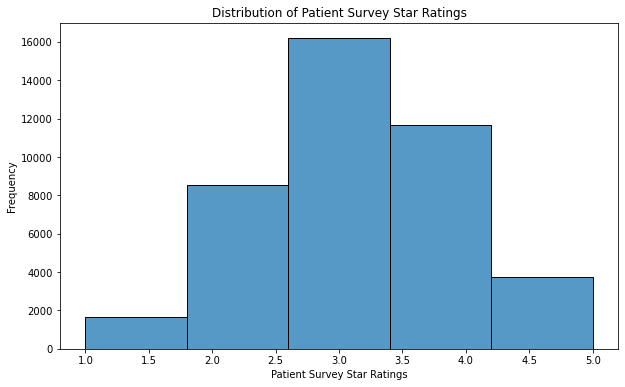

In [31]:
# Plot the distribution of patient survey star ratings across all hospitals
plt.figure(figsize=(10, 6))
sns.histplot(df2_cleaned['Patient Survey Star Rating'], bins=5)
plt.xlabel('Patient Survey Star Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Patient Survey Star Ratings')
plt.show()

**What is this distribution?**
- Across all the hospitals, what do the patient survey star ratings look like. This kind of looks like a normal distribution.

**Are there any outliers?**
- There are but every dataset has outliers, in this case it's the 1.0 to 1.5 and the 4.5 to 5 because they are at the extreme ends

In [32]:
# Distribution of ratings across different states
state_avg_ratings = df2_cleaned.groupby('State')['Patient Survey Star Rating'].mean().reset_index()
state_avg_ratings_sorted = state_avg_ratings.sort_values(by='Patient Survey Star Rating', ascending=False)
state_avg_ratings

,State,Patient Survey Star Rating
0,AK,3.378788
1,AL,3.293427
2,AR,3.163399
3,AZ,2.913978
4,CA,2.597875
5,CO,3.534591
6,CT,2.898148
7,DC,1.892857
8,DE,3.097222
9,FL,2.667653


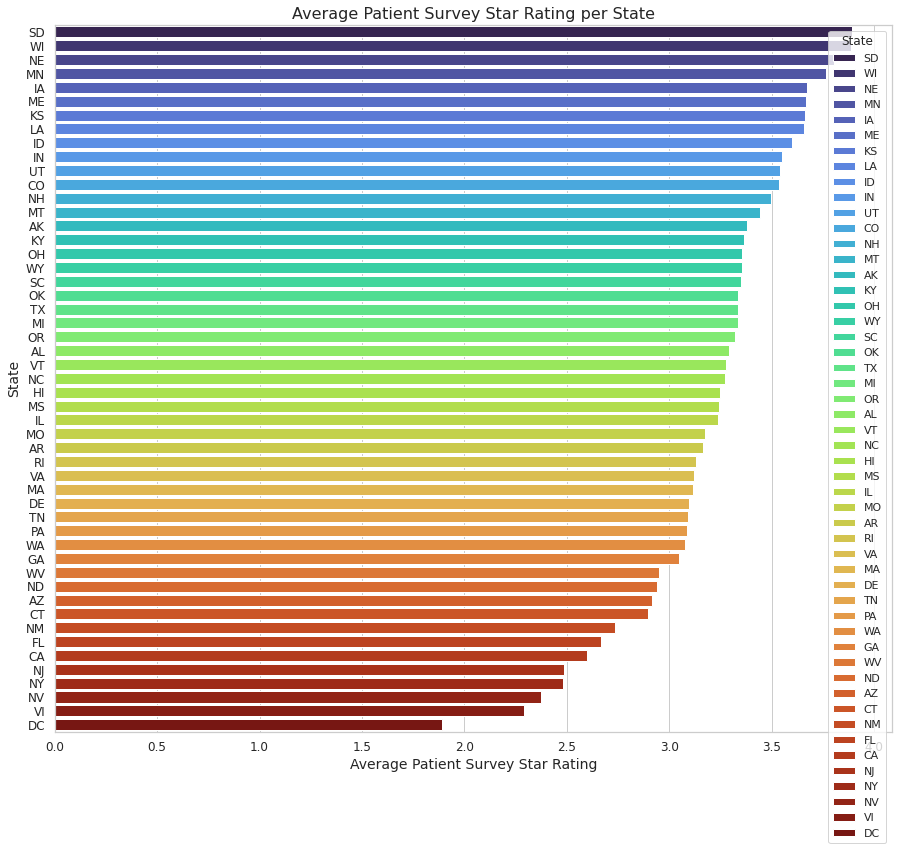

In [33]:
# Plot the average Patient Survey Star Rating per state with improved aesthetics
plt.figure(figsize=(15, 13))
sns.set_theme(style="whitegrid")


sns.barplot(x='Patient Survey Star Rating', y='State', data=state_avg_ratings_sorted, hue='State', dodge=False, palette="turbo")
plt.xlabel('Average Patient Survey Star Rating', fontsize=14)
plt.ylabel('State', fontsize=14)
plt.title('Average Patient Survey Star Rating per State', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**What is this distribution?**
- In the combined dataset, we plotted the average patient survey star rating for each state shown up in our dataset. This distribution is just to visualize what the ratings are like compared to each state.

**Are there any outliers?**
- None of the states have perfect ratings because patient survey star ratings range from 0 to 5. But DC since it's a small place so there are less hospitals which might've skewed the data.

In [34]:
# Patient star ratings for each hospital (based on the Hospital Name)
unique_ratings_per_provider = df2_cleaned.groupby('Hospital Name')['Patient Survey Star Rating'].unique().reset_index()
print(unique_ratings_per_provider)

                           Hospital Name Patient Survey Star Rating
0          ABBEVILLE AREA MEDICAL CENTER                 [5.0, 4.0]
1             ABBEVILLE GENERAL HOSPITAL            [4.0, 3.0, 5.0]
2           ABBOTT NORTHWESTERN HOSPITAL            [5.0, 4.0, 3.0]
3        ABILENE REGIONAL MEDICAL CENTER                 [2.0, 3.0]
4             ABINGTON MEMORIAL HOSPITAL            [3.0, 2.0, 4.0]
...                                  ...                        ...
3332           YOAKUM COMMUNITY HOSPITAL            [3.0, 5.0, 4.0]
3333               YORK GENERAL HOSPITAL            [3.0, 4.0, 5.0]
3334                       YORK HOSPITAL       [4.0, 3.0, 2.0, 5.0]
3335  YUKON KUSKOKWIM DELTA REG HOSPITAL       [2.0, 1.0, 3.0, 4.0]
3336        YUMA REGIONAL MEDICAL CENTER                 [3.0, 2.0]

[3337 rows x 2 columns]


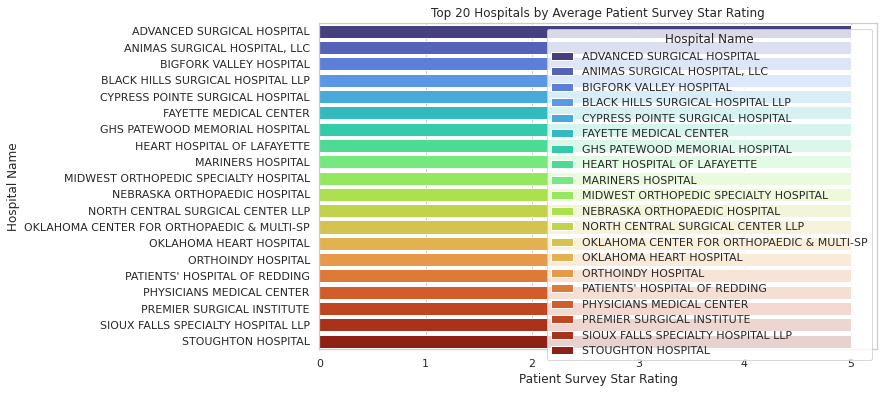

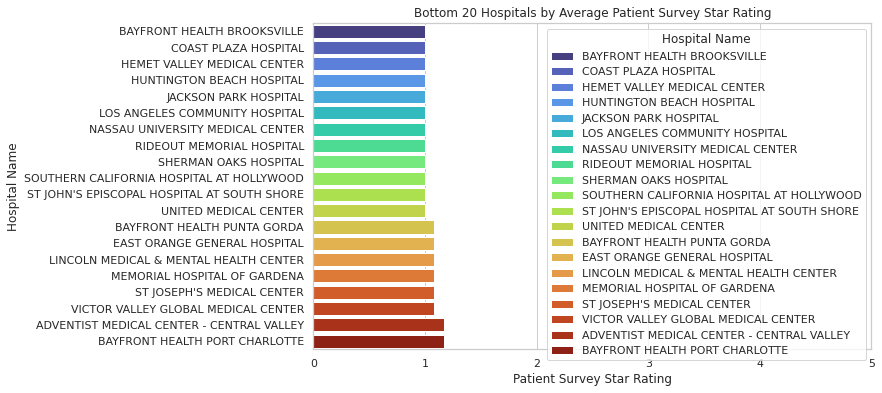

In [35]:
# Calculate average rating per Provider ID
avg_ratings_per_hospital = df2_cleaned.groupby('Hospital Name')['Patient Survey Star Rating'].mean().reset_index()

# Top 20 hospitals
top_hospitals = avg_ratings_per_hospital.nlargest(20, 'Patient Survey Star Rating')
plt.figure(figsize=(10, 6))
sns.barplot(x='Patient Survey Star Rating', y='Hospital Name', data=top_hospitals, hue='Hospital Name', dodge=False, palette="turbo")
plt.title('Top 20 Hospitals by Average Patient Survey Star Rating')
plt.show()

# Bottom 20 hospitals
bottom_hospitals = avg_ratings_per_hospital.nsmallest(20, 'Patient Survey Star Rating')
plt.figure(figsize=(10, 6))
sns.barplot(x='Patient Survey Star Rating', y='Hospital Name', data=bottom_hospitals, hue='Hospital Name', dodge=False, palette="turbo")
plt.title('Bottom 20 Hospitals by Average Patient Survey Star Rating')
plt.xlim(0, 5)
plt.show()

In [36]:
# Pivot the dataframe to have HCAHPS questions as columns
df2_pivot = df2_cleaned.pivot_table(index='Provider ID', columns='HCAHPS Question', values='Patient Survey Star Rating', aggfunc='mean')

# Drop columns with too many missing values
df2_pivot = df2_pivot.dropna(axis=1, thresh=int(0.5 * len(df2_pivot)))  # Keep columns with at least 50% non-null values

# Fill remaining missing values with the column mean
df2_pivot = df2_pivot.apply(lambda x: x.fillna(x.mean()), axis=0)

In [37]:
# Calculate the Spearman correlation matrix
correlation_matrix = df2_pivot.corr(method='spearman')

# Display the correlation matrix
print(correlation_matrix)

HCAHPS Question                              Care transition - star rating  \
HCAHPS Question                                                              
Care transition - star rating                                     1.000000   
Cleanliness - star rating                                         0.587059   
Communication about medicines - star rating                       0.670983   
Discharge information - star rating                               0.588951   
Doctor communication - star rating                                0.652284   
Nurse communication - star rating                                 0.737378   
Overall hospital rating - star rating                             0.768960   
Pain management - star rating                                     0.677110   
Quietness - star rating                                           0.484388   
Recommend hospital - star rating                                  0.739431   
Staff responsiveness - star rating                              

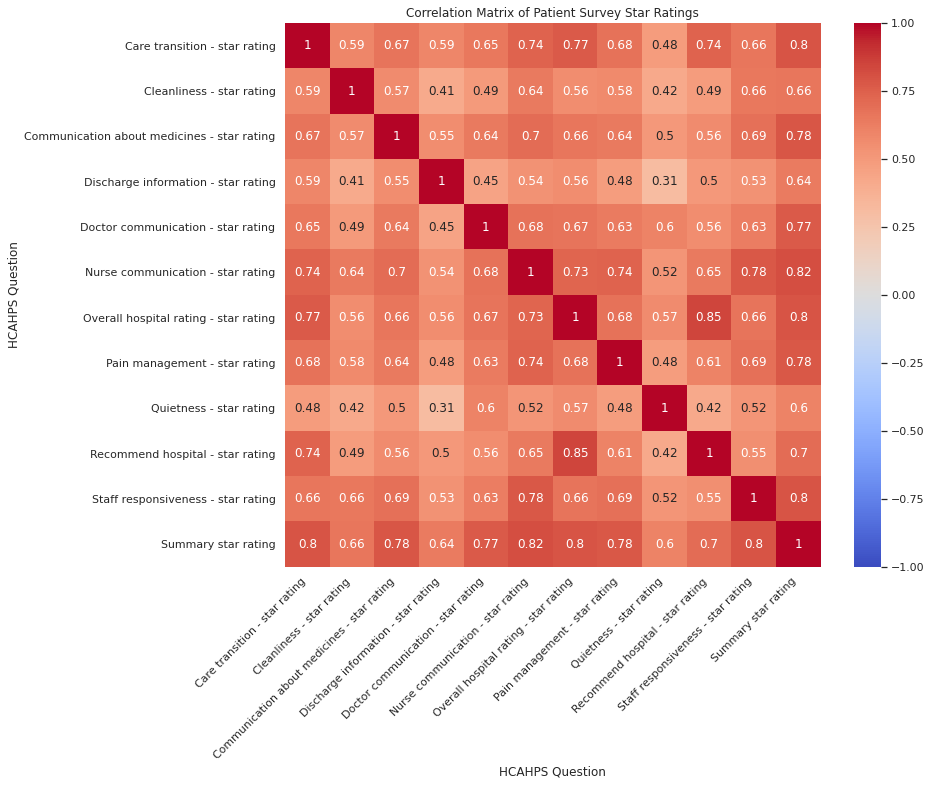

In [38]:
# Plot the correlation matrix with tilted labels
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Tilt the x and y tick labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)

plt.title('Correlation Matrix of Patient Survey Star Ratings')
plt.show()

The correlation matrix provides a detailed view of how different HCAHPS (Hospital Consumer Assessment of Healthcare Providers and Systems) survey questions are related to each other. Each element in the matrix represents the correlation coefficient between two variables (survey questions), which indicates the strength and direction of their linear relationship.

### Observations and Analysis of Correlation Matrix 

Strong Positive Correlations:

- **Overall Hospital Rating and Recommendation Rating** (0.846): Strong relationship indicating that patient recommendations are key drivers of overall hospital satisfaction.
- **Summary Star Rating and Nurse Communication** (0.818): Emphasizes the importance of nurse-patient interactions on overall summary ratings.
- **Care Transition and Summary Star Rating** (0.796): Indicates that good care transitions contribute to higher overall summary ratings.

Overall Rating Influencers:

- **Care Transition** (0.796), **Nurse Communication** (0.731), **Pain Management** (0.676), and **Staff Responsiveness** (0.664): These factors show strong correlations with the overall hospital rating, indicating their significant impact on overall patient satisfaction.

Interconnectedness:

- Nurse Communication is strongly correlated with multiple factors like **care transition** (0.737), **pain management** (0.742), and **staff responsiveness** (0.777). This suggests that improving nurse communication can lead to broader improvements in patient experience across various aspects.

### Takeaways
- **Targeted Improvements**: Hospitals should focus on improving nurse communication, care transitions, and staff responsiveness as these have the highest correlations with overall patient satisfaction and ratings.
- **Patient Recommendations**: Since recommendation ratings have the highest correlation with overall hospital ratings, hospitals should strive to provide care that encourages patients to recommend their services. This can be achieved by focusing on the quality of care, effective communication, and positive patient experiences.
- **Broader Impact**: Enhancing one key area, like nurse communication, can have a cascading positive effect on other related aspects of patient care, leading to overall improvement in patient experience.
- **Holistic Approach**: While areas like quietness have weaker correlations, they still contribute to the overall patient experience and should not be neglected. A balanced approach to improving various aspects of patient care will yield the best results.


## Comparison and Analysis of Dataset #1 and Dataset #2 

In this section, we dove into both datasets to find the correlation between the star ratings for certain HCAHP survey questions in Dataset #2, and the hospital overall ratings in Dataset #1.

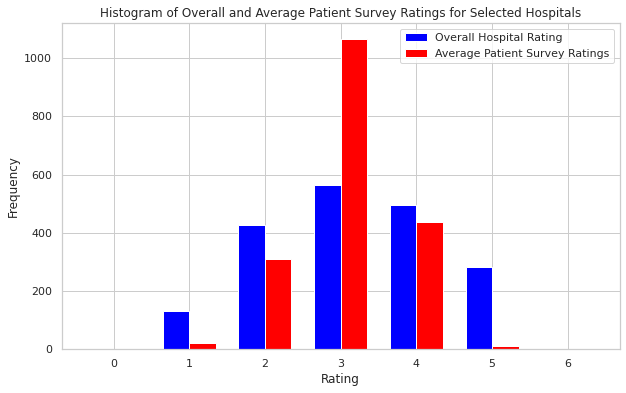

In [42]:
# Ensure all Provider IDs have 6 digits in df2_cleaned
df2_cleaned['Provider ID'] = df2_cleaned['Provider ID'].apply(lambda x: f'{int(x):06d}')

# Convert Facility ID to Provider ID by ensuring all IDs have 6 digits in df1_cleaned
df1_cleaned.loc[:, 'Provider ID'] = df1_cleaned['Facility ID'].apply(lambda x: f'{int(x):06d}')

# Get unique hospitals from df1_cleaned based on Provider ID
hospitals = df1_cleaned['Provider ID'].unique().tolist()

# Filter df2_cleaned for the chosen hospitals
df2_hospitals = df2_cleaned[df2_cleaned['Provider ID'].isin(hospitals)]

# Filter based on specific HCAHPS Questions
variables = df2_hospitals['HCAHPS Question'].isin([
    'Cleanliness - star rating',
    'Staff responsiveness - star rating',
    'Recommend hospital - star rating',
    'Discharge information - star rating',
    'Care transition - star rating',
    'Nurse communication - star rating',
    'Pain management - star rating',
    'Summary star rating',
    'Quietness - star rating'
])
df2_filtered = df2_hospitals.loc[variables]

# Calculate the average star rating for each hospital for the chosen questions
df_avg_ratings = df2_filtered.groupby('Provider ID')['Patient Survey Star Rating'].mean().reset_index()
df_avg_ratings.columns = ['Provider ID', 'Average Patient Survey Ratings']

# Create the bins
bins = np.arange(8) - 0.5  # Adjust bins to center at integers for 0 to 4 ratings

# Calculate the histograms
overall_rating_counts, _ = np.histogram(df1_cleaned['Hospital overall rating'], bins=bins)
average_specific_counts, _ = np.histogram(df_avg_ratings['Average Patient Survey Ratings'], bins=bins)

# Plot the histograms side by side
plt.figure(figsize=(10, 6))
width = 0.35  # Width of the bars

# Positions for the bars
r1 = np.arange(len(overall_rating_counts))
r2 = [x + width for x in r1]

plt.bar(r1, overall_rating_counts, width=width, label='Overall Hospital Rating', color='blue')
plt.bar(r2, average_specific_counts, width=width, label='Average Patient Survey Ratings', color='red')

plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Overall and Average Patient Survey Ratings for Selected Hospitals')
plt.xticks([r + width/2 for r in range(len(overall_rating_counts))], np.arange(7))  # Adjust x-ticks for 0 to 4 ratings
plt.legend()
plt.show()

**What is this distribution?**
- The histogram illustrates the distribution of hospital ratings from both Dataset #1 and Dataset #2. The blue bars represent the overall hospital ratings from Dataset #1, which aggregate various performance metrics. The red bars represent the average patient survey ratings from Dataset #2, which are derived from patient survey responses on specific aspects of their hospital experience. By plotting these two datasets side by side, we can observe the similarities and differences in the rating patterns between overall performance metrics and patient-specific experience metrics.

**Are there any outliers?**
- The histogram does not exhibit significant outliers. However, there are some disparities between the two datasets. For instance, there are more ratings clustered around 3 for specific question ratings (red) compared to the overall ratings (blue). This could suggest that while hospitals tend to receive consistent scores in specific areas, their overall ratings may vary more due to other performance factors not captured in the specific questions.

**Relationship between variables?**
- The histogram indicates a potential correlation between the overall hospital ratings and the specific question ratings. Hospitals that perform well in specific aspects of patient care (as shown by higher average ratings in red) tend to have higher overall ratings (blue). The overlap in the 3 to 4 rating range suggests that specific question performance positively influences the overall hospital rating, highlighting the interconnectedness between patient experience and overall hospital quality.

- This visualization underscores the importance of patient experience metrics in contributing to the overall perception of hospital quality. The close alignment of the two distributions around the middle rating values (3 and 4) reinforces this relationship, suggesting that improving specific aspects of patient care can potentially enhance a hospital's overall rating.








Data for question: Cleanliness - star rating
  Provider ID  Cleanliness - star rating  Hospital overall rating
0      010001                        2.0                        3
1      010006                        1.0                        1
2      010016                        1.0                        4
3      010023                        2.0                        2
4      010024                        2.0                        1
Data for question: Staff responsiveness - star rating
  Provider ID  Staff responsiveness - star rating  Hospital overall rating
0      010001                                 2.0                        3
1      010006                                 3.0                        1
2      010016                                 2.0                        4
3      010023                                 2.0                        2
4      010024                                 3.0                        1
Data for question: Recommend hospital - star rating
  P

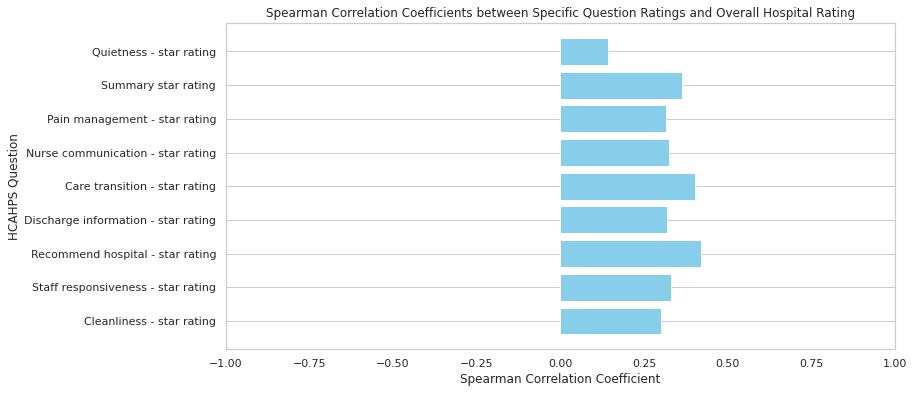

Question: Cleanliness - star rating
Spearman Correlation Coefficient: 0.299981853444234
p-value: 1.072785325068611e-39


Question: Staff responsiveness - star rating
Spearman Correlation Coefficient: 0.3301271474929143
p-value: 3.490440889707211e-48


Question: Recommend hospital - star rating
Spearman Correlation Coefficient: 0.4188708470997619
p-value: 2.4919482809567533e-79


Question: Discharge information - star rating
Spearman Correlation Coefficient: 0.31907876479973263
p-value: 5.86118389647514e-45


Question: Care transition - star rating
Spearman Correlation Coefficient: 0.40133250739491755
p-value: 2.1900641397640718e-72


Question: Nurse communication - star rating
Spearman Correlation Coefficient: 0.3251390441103595
p-value: 1.0365923440588124e-46


Question: Pain management - star rating
Spearman Correlation Coefficient: 0.31474771336571417
p-value: 9.903627653877693e-44


Question: Summary star rating
Spearman Correlation Coefficient: 0.363660844195353
p-value: 8.0719879

In [43]:
# List of HCAHPS questions to analyze
questions = [
    'Cleanliness - star rating',
    'Staff responsiveness - star rating',
    'Recommend hospital - star rating',
    'Discharge information - star rating',
    'Care transition - star rating',
    'Nurse communication - star rating',
    'Pain management - star rating',
    'Summary star rating',
    'Quietness - star rating'
]

# Initialize a dictionary to store the correlation results
correlation_results = {}

# Prepare data for the overall hospital ratings
overall_ratings = df1_cleaned['Hospital overall rating']

# Prepare a DataFrame to collect all the average ratings for each question
all_avg_ratings = pd.DataFrame(df1_cleaned[['Provider ID', 'Hospital overall rating']])

# Iterate over each question to calculate the correlation and collect data
for question in questions:
    # Filter based on the current HCAHPS question
    df_question_filtered = df2_hospitals[df2_hospitals['HCAHPS Question'] == question]
    
    # Check if there is sufficient data
    if df_question_filtered.empty:
        print(f"No data for question: {question}")
        continue

    # Calculate the average star rating for each hospital for the current question
    df_avg_ratings_question = df_question_filtered.groupby('Provider ID')['Patient Survey Star Rating'].mean().reset_index()
    df_avg_ratings_question.columns = ['Provider ID', f'{question}']
    
    # Merge the average specific question ratings with the overall hospital ratings
    df_combined_question = pd.merge(df_avg_ratings_question, df1_cleaned[['Provider ID', 'Hospital overall rating']], on='Provider ID')
    
    # Check the data after merging
    print(f"Data for question: {question}")
    print(df_combined_question.head())
    
    # Define the columns for correlation
    average_question_rating = df_combined_question[f'{question}']
    overall_hospital_rating = df_combined_question['Hospital overall rating']
    
    # Check if there is sufficient variation
    if average_question_rating.nunique() <= 1 or overall_hospital_rating.nunique() <= 1:
        print(f"Not enough variation for question: {question}")
        continue
    
    # Calculate Spearman correlation coefficient and p-value
    correlation_coefficient, p_value = spearmanr(average_question_rating, overall_hospital_rating)
    
    # Store the results in the dictionary
    correlation_results[question] = {
        'Spearman Correlation Coefficient': correlation_coefficient,
        'p-value': p_value
    }
    
    # Add the average ratings to the all_avg_ratings DataFrame
    all_avg_ratings = pd.merge(all_avg_ratings, df_avg_ratings_question, on='Provider ID')

# Extract the questions and their corresponding Spearman correlation coefficients
questions_list = list(correlation_results.keys())
correlation_coefficients = [correlation_results[question]['Spearman Correlation Coefficient'] for question in questions_list]

# Plot the Spearman correlation coefficients
plt.figure(figsize=(12, 6))
plt.barh(questions_list, correlation_coefficients, color='skyblue')
plt.xlabel('Spearman Correlation Coefficient')
plt.ylabel('HCAHPS Question')
plt.title('Spearman Correlation Coefficients between Specific Question Ratings and Overall Hospital Rating')
plt.xlim(-1, 1)  # Spearman correlation coefficient ranges from -1 to 1
plt.grid(axis='x')
plt.show()

# Print the correlation results
for question, results in correlation_results.items():
    print(f"Question: {question}")
    print(f"Spearman Correlation Coefficient: {results['Spearman Correlation Coefficient']}")
    print(f"p-value: {results['p-value']}")
    print("\n")

***What do these correlation coefficients mean?***
- The Spearman correlation coefficient measures the strength and direction of the association between two ranked variables. Here, it shows the correlation between each specific HCAHPS question's average star rating from Dataset #2 and the overall hospital rating from Dataset #1.

***Interpretation for the Graphs***
- The bar chart of Spearman correlation coefficients visually represents the strength of the relationship between each specific question rating and the overall hospital rating. Higher bars indicate a stronger positive correlation, suggesting that improvements in these areas are more likely to lead to higher overall hospital ratings.

***Overall Summary***

**Positive Correlations:**
- The strongest positive correlation is with the recommendation rating, care transition rating, and summary star rating. This suggests that these aspects have the most significant impact on the overall hospital rating.

**Negative Correlations:**
- There are no negative correlations observed in the data. All correlations are positive, indicating that improvements in any specific question rating generally lead to improvements in the overall hospital rating.

***Takeaways:***
- Focusing on improving specific aspects such as recommendations, care transitions, and overall summaries can have a notable positive effect on the overall hospital rating.
- Although all aspects are positively correlated, some have a stronger impact than others, highlighting areas where hospitals can prioritize their improvement efforts for maximum benefit.
- The relatively weaker correlation with the quietness rating, while still statistically significant, suggests that it has the least impact on overall hospital ratings compared to other factors.

# Ethics & Privacy

In our project, we will prioritize compliance with privacy laws and ethical data use. Our approach involves utilizing datasets that are already de-identified to ensure we uphold privacy standards such as those mandated by HIPAA. This strategy lowers risks associated with personal data breaches and aligns with legal requirements. We also commit to adhering strictly to the terms of use for all data sources, especially those provided by government entities and healthcare facilities, to prevent any legal or ethical violations.

Any type of data will inherently have some biases, so we'll aim to use a dataset that is as unbiased as possible. For instance, if most of our data comes from hospitals in wealthy areas, our results might not really represent what's happening in hospitals in less wealthy or rural areas. To fix this, we're going to look closely at who and where the data comes from before we start analyzing it. If we notice that certain types of areas or groups aren't well represented, we'll adjust our methods to try and even things out. By working with a variety of people, including those who work in healthcare and patient advocates, we hope to make sure our project reflects diverse perspectives and helps as many different groups as possible.

# Discussion and Conclusion

Our project aimed to investigate the correlation between the overall hospital ratings versus specific patient experience in certain categories measured by two different datasets, and ultimately answer our research question. As a group, we approached extracting and analyzing the necessary information by collecting and cleaning the two datasets to take relevant information on hospital ratings & patient experiences. Through this extraction, we identified commonality between the two datasets, notably hospitals reviewed in both datasets, & went about finding ways to correlate the data between the two sources to find answers to our research question. The project encompasses the cleaning & analysis of the two datasets independently, & then follows by analyzing the relation between the two datasets comparatively to find correlation between the ratings utilized in the two datasets. The only real limitation throughout the project is finding the most relevant star rating from Dataset #2 towards hospital overall rating, which was more or less not possible as there is no greater weight towards any star rating in the dataset. The project & our research seeks to identify certain aspects of healthcare & patient satisfaction in hospitals to look for weaknesses in the quality of these services, analyzing correlation between different hospital performance metrics & ideally enabling healthcare institutions to prioritize their efforts effectively to improve their overall performance in the eyes of patients who utilize these services.

The analysis of Dataset #1 observed a range of different hospital performance metrics being utilized, including hospital safety, readmission measures, mortality, & of course hospital overall ratings, each categorized by how well each identified hospital performed in this aspect. We generated histograms from the datasets that revealed patterns in the data, indicating a great deal of relatively similar or “no different” measures across the majority of hospitals for the metrics of mortality & safety, suggesting this aspect shows similar performance across most hospitals, indicating the two statistics as not being the main contributor for disparity in hospital ratings in our research. As we analyzed the data for Dataset #1, we found that readmission rates are the greatest contributor to the sway of overall ratings throughout our list of hospitals in Dataset #1. Analyzing Dataset #2, the hospital performance metrics utilized included different forms of “star ratings”, notably hospital cleanliness, staff responsiveness, pain management, quietness, & nurse communication, among other metrics. These metrics are measured on a similar scale as the one used in Dataset #1, out of a 0.0 to 5.0 rating, with each identified hospital receiving a score out of the scale for their performance in each aspect of star rating.

By comparing the information from Dataset #1 and Dataset #2, we conclude that specific aspects of patient care significantly influence the overall hospital rating. Notable examples include recommendations, care transitions, and overall summaries. The datasets reveal correlations between various star ratings in Dataset #2, such as cleanliness and staff responsiveness, and the overall hospital ratings in Dataset #1. Our analysis highlights a statistically significant correlation between the star rating categories in Dataset #2 and each hospital's overall rating metric in Dataset #1. Specifically, there is a striking correlation between the recommendation, care transition, and summary star ratings with the overall hospital rating. This suggests that these particular aspects of patient care are closely linked to a hospital's overall performance and reputation. In essence, our analysis demonstrates a strong statistical relationship between a hospital's overall rating and these key metrics of patient satisfaction.


# Team Contributions

Beatrice:
- Research Question, Background & Prior Work
- Hypothesis, Ethics & Privacy
- Data Overview, Some Cleaning of Dataset #1
- Video 


Kaye:
- Cleaning of Dataset #2
- Analysis and comparison of Datasets #1 and #2
- Discussion and Conclusion
- Abstract
- Video

Dinh:
- Cleaning of Dataset #2
- Analysis and comparison of Datasets #1 and #2
- Discussion and Conclusion
- Video

Vinuthna: 
- Data Overview + Cleaning
- Visualization for Dataset #2 (EDA)
- Analysis of Dataset #2 (EDA)
- Presentation + Video


Sanjuktha:
- Cleaning of Dataset #1
- Research question, background, hypothesis
- Graphs for Dataset #1 (EDA)
- Analysis for Dataset #1 (EDA)
- Video